# Correlation function of DR72 SDSS VAGC Catalog

First import all the modules such as healpy and astropy needed for analyzing the structure

In [1]:
import healpix_util as hu
import astropy as ap
import numpy as np
from astropy.io import fits
from astropy.table import Table
import astropy.io.ascii as ascii
from astropy.io import fits
from astropy.constants import c
import matplotlib.pyplot as plt
import math as m
from math import pi
#from scipy.constants import c
import scipy.special as sp
from astroML.decorators import pickle_results
from scipy import integrate
import warnings
from sklearn.neighbors import BallTree
import pickle
import multiprocessing as mp
import time
from lccmetric import *
from progressbar import *
from tqdm import *
from functools import partial
import pymangle
#from astroML.datasets import fetch_sdss_specgals
#from astroML.correlation import bootstrap_two_point_angular
%matplotlib inline

In [2]:
# Getting back the objects:
with open('datsLCf.pkl') as f:  # Python 3: open(..., 'rb')
    dat = pickle.load(f)
dat

array([[ 0.37169 ,  0.980185, -0.003863],
       [ 0.312739,  1.016617,  0.003776],
       [ 0.345944,  0.950251,  0.010821],
       ..., 
       [ 0.290404,  2.829918,  0.173514],
       [ 0.313432,  2.830242,  0.172112],
       [ 0.199924,  2.831786,  0.173661]])

In [3]:
bins=np.arange(0.,0.08,0.005)

In [4]:
print bins

[ 0.     0.005  0.01   0.015  0.02   0.025  0.03   0.035  0.04   0.045
  0.05   0.055  0.06   0.065  0.07   0.075]


In [5]:
Nbins=len(bins)

In [6]:
Nbins

16

In [7]:
binsq=(bins*0.007)**2

In [8]:
binsq

array([  0.00000000e+00,   1.22500000e-09,   4.90000000e-09,
         1.10250000e-08,   1.96000000e-08,   3.06250000e-08,
         4.41000000e-08,   6.00250000e-08,   7.84000000e-08,
         9.92250000e-08,   1.22500000e-07,   1.48225000e-07,
         1.76400000e-07,   2.07025000e-07,   2.40100000e-07,
         2.75625000e-07])

In [9]:
LCcmetric(dat[0],dat[1])

1.781962354940322e-07

In [10]:
%%time
BT_DLCc = BallTree(dat,metric='pyfunc',func=LCcmetric,leaf_size=5) 

with open('BTDdatsLCc.pkl', 'w') as f:
    pickle.dump(BT_DLCc,f)

CPU times: user 5.48 s, sys: 59.5 ms, total: 5.54 s
Wall time: 5.62 s


In [11]:
with open('BTDdatsLCc.pkl') as f:
    BTDLCc = pickle.load(f)
    
BTDLCc

In [12]:
%%time
start_time=time.time()
counts_DD=BTDLCc.two_point_correlation(dat,binsq)
print counts_DD
end_time=time.time()
tottime=end_time-start_time
print "Total run time:"
print tottime

with open('BTDcDDLCc.pkl', 'w') as f:
    pickle.dump(counts_DD,f)

[        0    430556   1545155   4071014   8753272  16333514  27544108
  43038292  63371498  88967022 120223272 157491949 201123950 251476236
 308836046 373458068]
Total run time:
1071.43457913
CPU times: user 17min 47s, sys: 2.68 s, total: 17min 49s
Wall time: 17min 51s


In [13]:
with open('BTDcDDLCc.pkl') as f:
    counts_DD = pickle.load(f)
    
counts_DD

array([        0,    430556,   1545155,   4071014,   8753272,  16333514,
        27544108,  43038292,  63371498,  88967022, 120223272, 157491949,
       201123950, 251476236, 308836046, 373458068])

In [14]:
DD=np.diff(counts_DD)

In [15]:
DD

array([  430556,  1114599,  2525859,  4682258,  7580242, 11210594,
       15494184, 20333206, 25595524, 31256250, 37268677, 43632001,
       50352286, 57359810, 64622022])

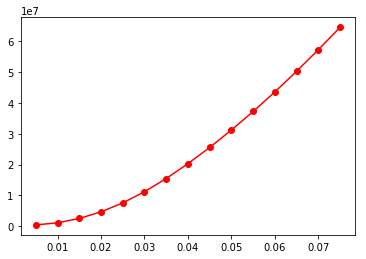

In [16]:
plt.plot(bins[1:len(bins)],DD,'ro-')

BallTree.two_point_correlation works almost 10 times faster! with leaf_size=5 Going with it to the random catalog

In [17]:
# Getting back the objects:
with open('rDR7200kLCsrarf.pkl') as f:  # Python 3: open(..., 'rb')
    datR = pickle.load(f)
datR

array([[ 0.37169 ,  2.992549,  0.248026],
       [ 0.312739,  2.737752,  0.711236],
       [ 0.345944,  2.367643,  0.341962],
       ..., 
       [ 0.311286,  3.228052,  0.199013],
       [ 0.283066,  3.218296,  0.052979],
       [ 0.188215,  4.056418,  0.170602]])

In [18]:
%%time
BT_RLCc = BallTree(datR,metric='pyfunc',func=LCcmetric,leaf_size=5) 

with open('BTR200kdatsLCc.pkl', 'w') as f:
    pickle.dump(BT_RLCc,f)

CPU times: user 13.3 s, sys: 142 ms, total: 13.5 s
Wall time: 13.6 s


In [19]:
with open('BTR200kdatsLCc.pkl') as f:
    BTRLCc = pickle.load(f)
    
BTRLCc

In [20]:
%%time
start_time=time.time()
counts_RR=BTRLCc.two_point_correlation(datR,binsq)
print counts_RR
end_time=time.time()
tottime=end_time-start_time
print "Total run time:"
print tottime

with open('BTR200kcRRLCc.pkl', 'w') as f:
    pickle.dump(counts_RR,f)

[         0     740302    4243471   13607518   31835970   61519382
  104888632  164139313  241632635  339633616  459897147  603757057
  771687784  964194740 1182458893 1427943190]
Total run time:
3566.83108592
CPU times: user 42min 57s, sys: 6.91 s, total: 43min 3s
Wall time: 59min 26s


In [21]:
with open('BTR200kcRRLCc.pkl') as f:
    counts_RR = pickle.load(f)
    
counts_RR

array([         0,     740302,    4243471,   13607518,   31835970,
         61519382,  104888632,  164139313,  241632635,  339633616,
        459897147,  603757057,  771687784,  964194740, 1182458893,
       1427943190])

In [22]:
RR=np.diff(counts_RR)

In [23]:
RR

array([   740302,   3503169,   9364047,  18228452,  29683412,  43369250,
        59250681,  77493322,  98000981, 120263531, 143859910, 167930727,
       192506956, 218264153, 245484297])

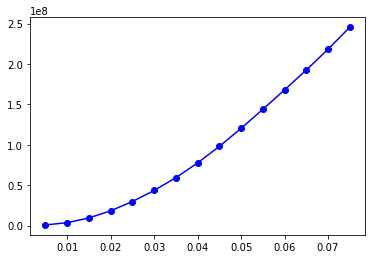

In [24]:
plt.plot(bins[1:len(bins)],RR,'bo-')

In [25]:
RR_zero = (RR == 0)
RR[RR_zero] = 1

In [26]:
%%time
start_time=time.time()
counts_DR=BTRLCc.two_point_correlation(dat,binsq)
print counts_DR
end_time=time.time()
tottime=end_time-start_time
print "Total run time:"
print tottime

with open('BTR200kcDRLCc.pkl', 'w') as f:
    pickle.dump(counts_DR,f)

[        0    254634   1974507   6618760  15684869  30453294  52098974
  81739903 120648354 169996353 230679384 303490611 388640981 486450093
 597556372 722862519]
Total run time:
1238.77458191
CPU times: user 20min 29s, sys: 3.58 s, total: 20min 33s
Wall time: 20min 38s


In [27]:
with open('BTR200kcDRLCc.pkl') as f:
    counts_DR = pickle.load(f)
    
counts_DR

array([        0,    254634,   1974507,   6618760,  15684869,  30453294,
        52098974,  81739903, 120648354, 169996353, 230679384, 303490611,
       388640981, 486450093, 597556372, 722862519])

In [28]:
DR=np.diff(counts_DR)

In [29]:
DR

array([   254634,   1719873,   4644253,   9066109,  14768425,  21645680,
        29640929,  38908451,  49347999,  60683031,  72811227,  85150370,
        97809112, 111106279, 125306147])

In [30]:
corrells=(4.0 * DD - 4.0 * DR + RR) / RR

In [31]:
corrells

array([ 1.95054181,  0.30888404,  0.09509467,  0.03802012,  0.03135354,
        0.03755901,  0.04495646,  0.04119506,  0.03052093,  0.02125671,
        0.01174552,  0.01105963,  0.01391977,  0.01501977,  0.01119337])

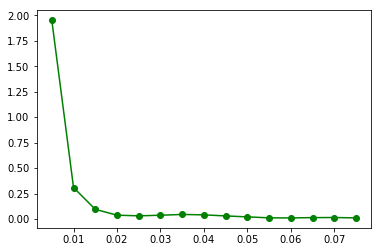

In [32]:
plt.plot(bins[1:len(bins)],corrells,'go-')

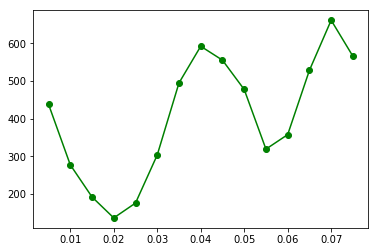

In [33]:
plt.plot(bins[1:len(bins)],bins[1:len(bins)]*bins[1:len(bins)]*corrells*(c*1e-5)**2,'go-')

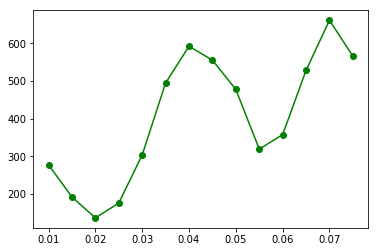

In [34]:
plt.plot(bins[2:len(bins)],bins[2:len(bins)]*bins[2:len(bins)]*corrells[1:len(bins)]*(c*1e-5)**2,'go-')

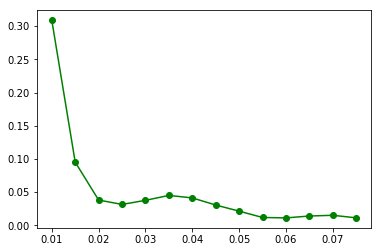

In [35]:
plt.plot(bins[2:len(bins)],corrells[1:len(bins)],'go-')

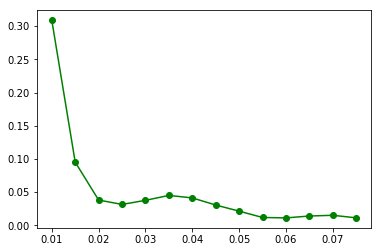

In [36]:
plt.plot(bins[2:len(bins)],corrells[1:len(bins)],'go-')
plt.savefig("correl2xlsLCc.pdf")

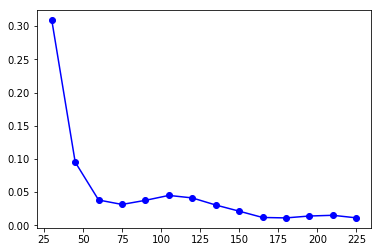

In [37]:
plt.plot(bins[2:len(bins)]*c/1e5,corrells[1:len(bins)],'bo-')
plt.savefig("correl2x1lsLCc.pdf")

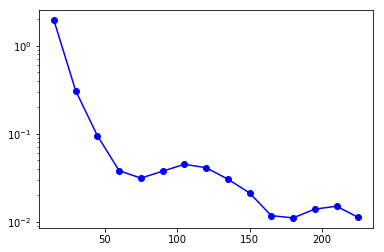

In [38]:
plt.yscale('log')
plt.plot(bins[1:len(bins)]*c/1e5,corrells,'bo-')
plt.savefig("correllsfiglogLCc.pdf")

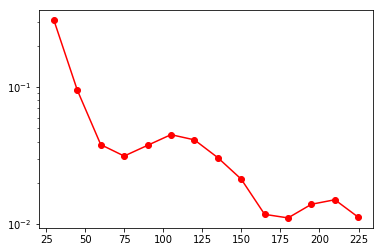

In [39]:
plt.yscale('log')
plt.plot(bins[2:len(bins)]*c/1e5,corrells[1:len(bins)],'ro-')
plt.savefig("correllslog2xLCc.pdf")

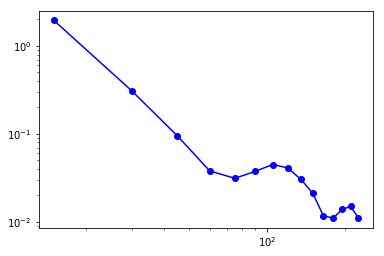

In [40]:
plt.yscale('log')
plt.xscale('log')
plt.plot(bins[1:len(bins)]*c/1e5,corrells,'bo-')
plt.savefig("correllsloglogLCc.pdf")